In [4]:
import numpy as np
import pandas as pd

from scipy.io import mmread

import statsmodels.api as sm
#import sys

# load data

## expression data

In [5]:
#exp_data=mmread('/data01/ch6845/single_cell/data/extract/HumanLiver.data.counts.mm').toarray()

In [16]:
exp_data=mmread('data/extract/HumanLiver.data.counts.mm').toarray()
with open('data/extract/HumanLiver.data.col','r') as f: exp_data_col=[i.strip().strip('"') for i in f.read().split()]
with open('data/extract/HumanLiver.data.row','r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]
assert exp_data.shape==(len(exp_data_row),len(exp_data_col))
#mm2=mm.tocsc(copy=True)
#sys.getsizeof(mm)
#mm.data.nbytes
#a=mm.toarray()
#type(mm)

In [17]:
exp_data,exp_data.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]), (20007, 8444))

In [18]:
exp_data_row[:5],exp_data_col[:5]

(['RP11-34P13.7', 'FO538757.2', 'AP006222.2', 'RP4-669L17.10', 'RP5-857K21.4'],
 ['P1TLH_AAACCTGAGCAGCCTC_1',
  'P1TLH_AAACCTGTCCTCATTA_1',
  'P1TLH_AAACCTGTCTAAGCCA_1',
  'P1TLH_AAACGGGAGTAGGCCA_1',
  'P1TLH_AAACGGGGTTCGGGCT_1'])

In [19]:
exp_data_meta=pd.read_csv('data/extract/HumanLiver.metadata.tsv',sep='\t')
exp_data_meta.head()

,total_counts,total_features,orig.ident,res.0.8,S.Score,G2M.Score,Phase
P1TLH_AAACCTGAGCAGCCTC_1,2943,1427,P1TLH,12,0.046089,0.000349,S
P1TLH_AAACCTGTCCTCATTA_1,10897,2522,P1TLH,17,-0.000357,0.009434,G2M
P1TLH_AAACCTGTCTAAGCCA_1,1914,1018,P1TLH,12,0.012811,-0.056561,S
P1TLH_AAACGGGAGTAGGCCA_1,5574,1798,P1TLH,10,-0.011324,-0.047102,G1
P1TLH_AAACGGGGTTCGGGCT_1,3700,1417,P1TLH,2,0.057467,-0.003861,S


`clusterid2name` is used to convert integers in `res.0.8` to cell-type name

In [21]:
clusterid2clustername=pd.read_csv('data/extract/HumanLiver.clusterid2clustername.tsv',sep='\t',header=None,index_col=0)
len(clusterid2clustername[1].unique()),clusterid2clustername

(11,                          1
 0                         
 1              Hepatocytes
 2               ab T cells
 3              Hepatocytes
 4              Macrophages
 5              Hepatocytes
 6              Hepatocytes
 7             Plasma cells
 8                 NK cells
 9               gd T cells
 10             Macrophages
 11                   LSECs
 12                   LSECs
 13                   LSECs
 14             Hepatocytes
 15             Hepatocytes
 16          Mature B cells
 17          Cholangiocytes
 18              gd T cells
 19         Erythroid cells
 20  Hepatic Stellate Cells)

In [58]:
clustername2markers={'Hepatocytes':['ALB','HAMP','ARG1','PCK1','AFP','BCHE'],
'LSECs':['CALCRL','CD32B','VWF'],
'Cholangiocytes':['KRT19','EPCAM','FXDY2','CLDN4','CLDN10','SOX9','MMP7','CXCL1','CFTR','TFF2','KRT7','CD24'],
'Hepatic_Stellate_Cells':['ACTA2','COL1A1','TAGLN','COL1A2','COL3A1','SPARC','RBP1','DCN','MYL9'],
'Macrophages':['CD68','MARCO'],
'ab_T_cells':['CD2','CD3D','TRAC','IL32','CD3E'],
'gd_T_cells':['NKG7','FCGR3A','HOPX','GNLY'],
'NK_cells':['GZMK','KLRF1','CCL3','CMC1'],
'Plasma_cells':['CD27','IGHG1'],
'Mature_B_cells':['MS4A1','LTB','CD52','IGHD'],
'Erythroid_cells':['HBB','SLC25A37','CA1','ALAS2']
}

In [68]:
clustername2markers_new={'Cholangiocytes':['KRT19','EPCAM','FXYD2','CLDN4','CLDN10','SOX9','MMP7','CXCL1','CFTR','TFF2','KRT7','CD24'],
'Mature_B_cells':['MS4A1','IGHD','CD79A','PTPRC','IGKC','CD19'],
'Hepatocytes':['ALB','HAMP','ARG1','PCK1','AFP','BCHE'],
'LSECs':['CALCRL','VWF','PECAM1','CLEC14A','EMCN'],
'Hepatic_Stellate_Cells':['ACTA2','COL1A1','TAGLN','COL1A2','COL3A1','SPARC','RBP1','DCN','MYL9'],
'Macrophages':['CD68','MARCO','FCGR3A','LYZ','PTPRC','AIF1'],
'ab_T_cells':['CD2','CD3D','TRAC','IL32','CD3E','PTPRC'],
'gd_T_cells':['NKG7','FCGR3A','HOPX','GNLY','CMC1','KLRF1','CCL3','PTPRC'],
'NK_cells':['GZMK','KLRF1','CCL3','CMC1','NKG7','PTPRC'],
'Plasma_cells':['CD27','IGHG1','IGHA1','IGHM','CD79A','PTPRC','IGKC'],
'Erythroid_cells':['HBB','SLC25A37','CA1','ALAS2']}

#for key,value in clustername2markers_new.items():
#    for i in value:
#        print(markers_db[(markers_db['official gene symbol']==i)].shape)
#markers_db[(markers_db['official gene symbol']=='CD32B') |(markers_db['nicknames'].str.contains('CD32B'))]

## PanglaoDB cell-type markers

In [11]:
markers_db=pd.read_csv("data/PanglaoDB_markers_27_Mar_2020.tsv.gz",sep='\t')
markers_db=markers_db[markers_db['species'].str.contains('Hs')].drop(columns='species')
markers_db.head()

,official gene symbol,cell type,nicknames,ubiquitousness index,product description,gene type,canonical marker,germ layer,organ,sensitivity_human,sensitivity_mouse,specificity_human,specificity_mouse
0,CTRB1,Acinar cells,CTRB,0.017,chymotrypsinogen B1,protein-coding gene,1.0,Endoderm,Pancreas,1.000000,0.957143,0.000629,0.015920
1,KLK1,Acinar cells,Klk6,0.013,kallikrein 1,protein-coding gene,1.0,Endoderm,Pancreas,0.833333,0.314286,0.005031,0.012826
2,RBPJL,Acinar cells,RBP-L|SUHL|RBPSUHL,0.001,recombination signal binding protein for immun...,protein-coding gene,1.0,Endoderm,Pancreas,0.000000,0.000000,0.000000,0.000000
3,PTF1A,Acinar cells,PTF1-p48|bHLHa29,0.001,pancreas associated transcription factor 1a,protein-coding gene,1.0,Endoderm,Pancreas,0.000000,0.157143,0.000629,0.000773
5,CELA3A,Acinar cells,ELA3|ELA3A,0.001,chymotrypsin like elastase family member 3A,protein-coding gene,1.0,Endoderm,Pancreas,0.833333,0.128571,0.000000,0.000000


## matching gene index between expression data and PanglaoDB

In [60]:
gene_index_1=pd.Index(np.unique(exp_data_row))
len(gene_index_1)

20007

In [61]:
gene_index_1_=pd.Index(np.unique([j for i in list(clustername2markers.values()) for j in i]))
len(gene_index_1_)

55

In [62]:
gene_index_1__=pd.Index(np.unique([j for i in list(clustername2markers_new.values()) for j in i]))
len(gene_index_1__)

63

In [63]:
gene_index_2=pd.Index(markers_db['official gene symbol'].unique())
len(gene_index_2)

4345

In [64]:
gene_index_3=pd.Index(np.unique([j for i in [i.split('|') for i in markers_db['nicknames'][~markers_db['nicknames'].isnull()].values] for j in i ]))
len(gene_index_3)

9471

In [65]:
len(gene_index_1),len(gene_index_2),len(gene_index_3),len(gene_index_1.intersection(gene_index_2)),len(gene_index_1.intersection(gene_index_3))

(20007, 4345, 9471, 3543, 127)

In [66]:
len(gene_index_1_),len(gene_index_1_.intersection(gene_index_1)),len(gene_index_1_.intersection(gene_index_2)),len(gene_index_1_.intersection(gene_index_3))

(55, 53, 52, 3)

In [67]:
len(gene_index_1__),len(gene_index_1__.intersection(gene_index_1)),len(gene_index_1__.intersection(gene_index_2)),len(gene_index_1__.intersection(gene_index_3))

(63, 63, 62, 2)

# Gene selection

?? what is `6872 cells` in supplementary note 1

## Prepare for running GLM

### define GLM family and link function

In [263]:
print(sm.families.Poisson().links)
family=sm.families.Poisson(link=sm.families.links.log())

[<class 'statsmodels.genmod.families.links.log'>, <class 'statsmodels.genmod.families.links.identity'>, <class 'statsmodels.genmod.families.links.sqrt'>]


### Convert data (exp_data,exp_data_col,exp_data_row) to input for for GLM

In [277]:
x_data_intercept=np.array([np.ones(exp_data.shape[1])]).transpose()
x_data_intercept.shape

(8444, 1)

In [278]:
exp_data_col_patient=pd.Series(exp_data_col)
print(exp_data_col_patient.head())
exp_data_col_patient=pd.Series(exp_data_col).str.slice(start=1,stop=2).astype(int)
x_data_covariate=np.eye(len(exp_data_col_patient.unique()))[exp_data_col_patient.values-1]
x_data_covariate,x_data_covariate.shape

0    P1TLH_AAACCTGAGCAGCCTC_1
1    P1TLH_AAACCTGTCCTCATTA_1
2    P1TLH_AAACCTGTCTAAGCCA_1
3    P1TLH_AAACGGGAGTAGGCCA_1
4    P1TLH_AAACGGGGTTCGGGCT_1
dtype: object


(array([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]]), (8444, 5))

In [279]:
x_data_covariate=x_data_covariate[:,:-1]#exclude the last col to avoid colinearity
x_data_covariate.shape

(8444, 4)

In [280]:
x_data_null=np.concatenate([x_data_intercept,x_data_covariate],axis=1)

## Run regression

### test

In [290]:
print(exp_data_row[0],'is not in cell-type marker list')
y_data=exp_data[0,:]
model=sm.GLM(y_data,x_data_null,family=family)
model_result=model.fit()
model_result.summary()

RP11-34P13.7 is not in cell-type marker list


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 8444
Model:                            GLM   Df Residuals:                     8439
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -83.859
Date:                Sat, 11 Apr 2020   Deviance:                       143.72
Time:                        16:03:33   Pearson chi2:                 8.43e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.4413      1.000     -7.441      0.000      -9.401      -5.481
x1             1.1609      1.225      0.948      0.343      -1.240       3.561
x2             0.3355      1.414      0.237      0.812      -2.436       3.107
x3            -0.6065      1.414     -0.429      0.668      -3.378       2.165
x4             2.1981      1.069      2.056      0.040       0.103       4.293
==============================================================================
"""

In [297]:
print(exp_data_row[10258],'is in Erythroid cell marker list')
y_data=exp_data[10258,:]
model=sm.GLM(y_data,x_data_null,family=family)
model_result=model.fit()
model_result.summary()

HBB is in Erythroid cell marker list


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 8444
Model:                            GLM   Df Residuals:                     8439
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.7131e+05
Date:                Sat, 11 Apr 2020   Deviance:                   1.9351e+06
Time:                        16:05:52   Pearson chi2:                 1.99e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8267      0.002   2226.446      0.000       4.822       4.831
x1            -3.9607      0.020   -198.394      0.000      -4.000      -3.922
x2            -3.5463      0.015   -232.476      0.000      -3.576      -3.516
x3            -3.3963      0.009   -376.902      0.000      -3.414      -3.379
x4            -1.4950      0.006   -265.661      0.000      -1.506      -1.484
==============================================================================
"""

## Run regression for all genes

each iteration takes up approximately 0.02 sec

all 20,000 genes -> 400 sec

In [309]:
ll_list=[]
for exp_data_row_idx in range(exp_data.shape[0]):
    y_data=exp_data[exp_data_row_idx,:]
    model=sm.GLM(y_data,x_data_null,family=family)
    model_result=model.fit()
    #model_result.summary()
    ll_list.append(model_result.llf)
#model_result.llf,model_result.llnull,model_result.null_deviance,model_result.null

In [317]:
import matplotlib.pyplot as plt

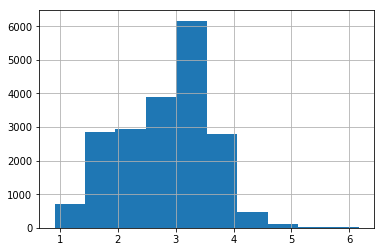

In [336]:
ll_series=pd.Series(ll_list,index=exp_data_row)
ll_series.apply(lambda x: np.log10(-x)).hist()

In [361]:
ll_series.apply(lambda x: np.log10(-x)).loc[gene_index_1_].sort_values(ascending=False)

/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


HBB         5.987360
ALB         5.645487
IGHG1       5.518330
HAMP        4.768465
NKG7        4.346460
GNLY        4.311835
TAGLN       4.272118
CA1         4.252243
CCL3        4.249670
CMC1        4.228890
PCK1        4.207075
ARG1        4.201217
MARCO       4.144979
IL32        4.142053
CD52        4.019015
FCGR3A      3.969295
SLC25A37    3.957976
TFF2        3.943805
VWF         3.936800
ACTA2       3.914464
SPARC       3.893835
CD68        3.882908
BCHE        3.862095
LTB         3.830178
CD3D        3.815856
COL1A1      3.789089
TRAC        3.772432
GZMK        3.753389
KLRF1       3.750559
CD2         3.731857
RBP1        3.719013
CD24        3.698524
CD27        3.683540
CD3E        3.681543
COL1A2      3.622084
COL3A1      3.601454
CALCRL      3.598987
HOPX        3.584029
ALAS2       3.584018
DCN         3.551039
AFP         3.477503
MYL9        3.469536
KRT7        3.425461
KRT19       3.425039
CXCL1       3.306981
CLDN10      3.101486
CLDN4       3.069137
MS4A1       3

# Deprecated

In [354]:
gene_index_1_

Index(['ACTA2', 'AFP', 'ALAS2', 'ALB', 'ARG1', 'BCHE', 'CA1', 'CALCRL', 'CCL3',
       'CD2', 'CD24', 'CD27', 'CD32B', 'CD3D', 'CD3E', 'CD52', 'CD68', 'CFTR',
       'CLDN10', 'CLDN4', 'CMC1', 'COL1A1', 'COL1A2', 'COL3A1', 'CXCL1', 'DCN',
       'EPCAM', 'FCGR3A', 'FXDY2', 'GNLY', 'GZMK', 'HAMP', 'HBB', 'HOPX',
       'IGHD', 'IGHG1', 'IL32', 'KLRF1', 'KRT19', 'KRT7', 'LTB', 'MARCO',
       'MMP7', 'MS4A1', 'MYL9', 'NKG7', 'PCK1', 'RBP1', 'SLC25A37', 'SOX9',
       'SPARC', 'TAGLN', 'TFF2', 'TRAC', 'VWF'],
      dtype='object')

In [347]:
ll_series_clip=ll_series.sort_values().iloc[:1000]

In [348]:
ll_series_clip.index

Index(['IGKC', 'SAA1', 'IGLC2', 'HBB', 'SAA2', 'IGLC3', 'ORM1', 'HP', 'FTL',
       'APOC3',
       ...
       'RNF181', 'ACADVL', 'SNRPB2', 'IDH1', 'C8orf59', 'UBXN1', 'SYF2',
       'C17orf89', 'LRRFIP1', 'KLRD1'],
      dtype='object', length=1000)

In [353]:
len(gene_index_1_.intersection(ll_series_clip.index))

19

In [296]:
model_result.llf?

Type:            float64
String form:     -971314.1894018359
File:            ~/tools/miniconda3/lib/python3.7/site-packages/numpy/__init__.py
Docstring:       <no docstring>
Class docstring:
Double-precision floating-point number type, compatible with Python `float`
and C ``double``.
Character code: ``'d'``.
Canonical name: ``np.double``.
Alias: ``np.float_``.
Alias *on this platform*: ``np.float64``: 64-bit precision floating-point number type: sign bit, 11 bits exponent, 52 bits mantissa.


In [285]:
dir(model_result)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_data_attr_model',
 '_endog',
 '_freq_weights',
 '_get_robustcov_results',
 '_iweights',
 '_n_trials',
 '_use_t',
 '_var_weights',
 'aic',
 'bic',
 'bse',
 'conf_int',
 'converged',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'data_in_cache',
 'deviance',
 'df_model',
 'df_resid',
 'f_test',
 'family',
 'fit_history',
 'fittedvalues',
 'get_hat_matrix_diag',
 'get_influence',
 'get_prediction',
 'initialize',
 'k_constant',
 'llf',
 'llnull',
 'load',
 'method',
 'mle_settings',
 'model',
 'mu',
 'nobs',
 'normalized_cov_params',
 'null',
 'null_deviance',
 'params',
 'pearson_chi2',
 'plot_added_

In [254]:
#x_data_null[:,:5]

In [103]:
#model_null=sm.GLM(y_data[common_idx], x_data_null[common_idx], family=family,missing='raise')
#model_null_result=model_null.fit()

#model_full=sm.GLM(y_data[common_idx], x_data_full[common_idx], family=family,missing='raise')
#model_full_result=model_full.fit()   

In [23]:
markers_db[markers_db['official gene symbol']==('BCHE')]

,official gene symbol,cell type,nicknames,ubiquitousness index,product description,gene type,canonical marker,germ layer,organ,sensitivity_human,sensitivity_mouse,specificity_human,specificity_mouse
1342,BCHE,Delta cells,CHE2,0.003,butyrylcholinesterase,protein-coding gene,1.0,Endoderm,Pancreas,0.000000,0.000000,0.005339,0.002440
3554,BCHE,Hepatocytes,CHE2,0.003,butyrylcholinesterase,protein-coding gene,1.0,Endoderm,Liver,0.108108,0.275000,0.004120,0.001737
7477,BCHE,Schwann cells,CHE2,0.003,butyrylcholinesterase,protein-coding gene,NaN,Ectoderm,Brain,0.000000,0.022988,0.005326,0.002323


In [19]:
sorted(meta_data['res.0.8'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [21]:
#exp_data.toarray()

In [23]:
assert markers_db[['official gene symbol','cell type']].duplicated().sum()==0

In [24]:
markers_db.shape

(7851, 13)

In [25]:
len(markers_db['cell type'].unique())

178

In [26]:
len(markers_db['official gene symbol'].unique())

4345

In [27]:
#markers_db.index=pd.MultiIndex.from_frame(markers_db[['cell type','official gene symbol']])

In [28]:
' , '.join(markers_db['cell type'].unique())

'Acinar cells , Adipocyte progenitor cells , Adipocytes , Adrenergic neurons , Airway epithelial cells , Airway goblet cells , Airway smooth muscle cells , Alpha cells , Alveolar macrophages , Anterior pituitary gland cells , Astrocytes , B cells , B cells memory , B cells naive , Basal cells , Basophils , Bergmann glia , Beta cells , Cajal-Retzius cells , Cardiac stem and precursor cells , Cardiomyocytes , Cholangiocytes , Cholinergic neurons , Chondrocytes , Choroid plexus cells , Chromaffin cells , Ciliated cells , Clara cells , Crypt cells , Decidual cells , Delta cells , Dendritic cells , Distal tubule cells , Dopaminergic neurons , Ductal cells , Embryonic stem cells , Endothelial cells , Endothelial cells (aorta) , Endothelial cells (blood brain barrier) , Enteric glia cells , Enteric neurons , Enterochromaffin cells , Enterocytes , Enteroendocrine cells , Eosinophils , Ependymal cells , Epiblast cells , Epithelial cells , Epsilon cells , Erythroblasts , Erythroid-like and eryth

In [105]:
a=pd.Series(markers_db['cell type'].unique())

In [108]:
a[a.str.contains('T')]

In [15]:
savedRes

NameError: name 'savedRes' is not defined

In [16]:
import statsmodels.api as sm